In [87]:
import os
import pathlib as pl
from matplotlib import pyplot as plt
from PIL import Image
from DataAugmentation import DataAugmentation
import cv2
import numpy as np
import random

%matplotlib inline

In [88]:
da = DataAugmentation()

info = da.analyzeImageDatabase()
info

[('e:\\Uni\\Kuenstliche-Intelligenz\\Projektarbeit\\Projektarbeit-Kuenstliche-Intelligenz\\images\\0 Dosenoeffner',
  []),
 ('e:\\Uni\\Kuenstliche-Intelligenz\\Projektarbeit\\Projektarbeit-Kuenstliche-Intelligenz\\images\\1 Flaschenoeffner',
  []),
 ('e:\\Uni\\Kuenstliche-Intelligenz\\Projektarbeit\\Projektarbeit-Kuenstliche-Intelligenz\\images\\2 Korkenzieher',
  []),
 ('e:\\Uni\\Kuenstliche-Intelligenz\\Projektarbeit\\Projektarbeit-Kuenstliche-Intelligenz\\images\\3 Multi',
  []),
 ('e:\\Uni\\Kuenstliche-Intelligenz\\Projektarbeit\\Projektarbeit-Kuenstliche-Intelligenz\\images\\test',
  [{'filename': '20211217_181033.jpg',
    'type': 'jpg',
    'dimensions': (5664, 3184),
    'size': 3254.4931640625},
   {'filename': '20211217_181244.jpg',
    'type': 'jpg',
    'dimensions': (5664, 3184),
    'size': 3777.0595703125},
   {'filename': '20211217_181805.jpg',
    'type': 'jpg',
    'dimensions': (5664, 3184),
    'size': 3517.5888671875},
   {'filename': '20211217_181910.jpg',
    'ty

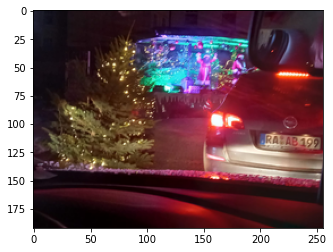

In [89]:
# Image resize ohne padding PILLOW
image = Image.open('E:/Uni/Kuenstliche-Intelligenz/Projektarbeit/Projektarbeit-Kuenstliche-Intelligenz/images/test/IMG-20211217-WA0001.jpg')

image.thumbnail((256, 256), Image.ANTIALIAS)
plt.imshow(image)

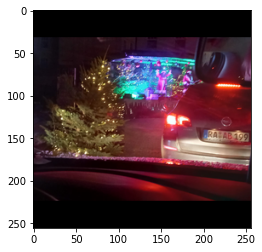

In [90]:
# Image resize mit padding PILLOW
image = Image.open('E:/Uni/Kuenstliche-Intelligenz/Projektarbeit/Projektarbeit-Kuenstliche-Intelligenz/images/test/IMG-20211217-WA0001.jpg')

pad_test = da.expand2square(image, 256, (0, 0, 0))
plt.imshow(pad_test)

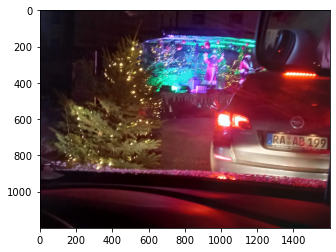

In [91]:
# OPENCV
image = cv2.imread('E:/Uni/Kuenstliche-Intelligenz/Projektarbeit/Projektarbeit-Kuenstliche-Intelligenz/images/test/IMG-20211217-WA0001.jpg')
image = np.flip(image, axis=-1)
plt.imshow(image)

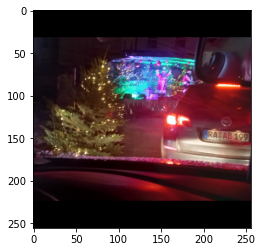

In [92]:
# Image resize mit padding OPENCV
image = cv2.imread('E:/Uni/Kuenstliche-Intelligenz/Projektarbeit/Projektarbeit-Kuenstliche-Intelligenz/images/test/IMG-20211217-WA0001.jpg')
image = da.resizeAndPad(image, (256, 256), 0)
image = np.flip(image, axis=-1)
plt.imshow(image)

In [93]:
def fill(img, h, w):
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img

In [94]:
def horizontal_shift(img, ratio=0.0):
    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = w*ratio
    if ratio > 0:
        img = img[:, :int(w-to_shift), :]
    if ratio < 0:
        img = img[:, int(-1*to_shift):, :]
    img = fill(img, h, w)
    return img

In [95]:
def rotation(img, angle):
    angle = int(random.uniform(-angle, angle))
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    return img

In [ ]:
def rotation(img, angle):
    angle = int(random.uniform(-angle, angle))
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    return img